In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import yfinance as yf

In [3]:
assets=['AMD','NFLX','AAPL','GOOG']#random stocks

In [4]:
weights=np.array([0.25,0.25,0.25,0.25])#random weights

In [5]:
df=yf.download(assets,start='2019-01-01',end='2025-01-01')['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed


In [6]:
df.head()

Ticker,AAPL,AMD,GOOG,NFLX
Date,,,,
2019-01-02,37.667194,18.830000,52.045986,267.660004
2019-01-03,33.915241,17.049999,50.563515,271.200012
2019-01-04,35.363075,19.000000,53.283127,297.570007
2019-01-07,35.284370,20.570000,53.167671,315.339996
2019-01-08,35.956989,20.750000,53.560314,320.269989


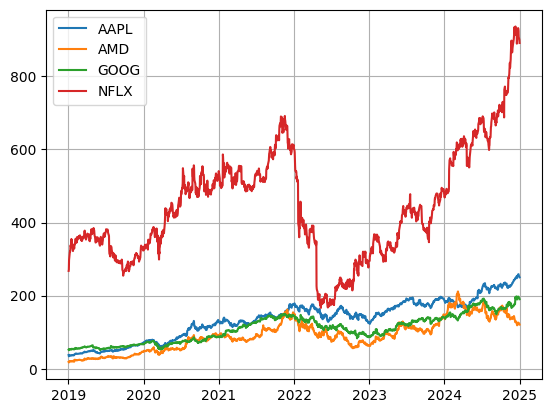

In [7]:
plt.plot(df)
plt.legend(df.columns)
plt.grid(True)
plt.show()

In [8]:
returns=df.pct_change()
returns

Ticker,AAPL,AMD,GOOG,NFLX
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.099608,-0.094530,-0.028484,0.013226
2019-01-04,0.042690,0.114370,0.053786,0.097234
2019-01-07,-0.002226,0.082632,-0.002167,0.059717
2019-01-08,0.019063,0.008751,0.007385,0.015634
...,...,...,...,...
2024-12-24,0.011478,0.013563,0.008062,0.022678
2024-12-26,0.003176,-0.009740,-0.002379,-0.008561
2024-12-27,-0.013242,0.001040,-0.015525,-0.017952


In [9]:
#create and showing annualized covar matrix
cov_matrix_annual=returns.cov()*252
cov_matrix_annual

Ticker,AAPL,AMD,GOOG,NFLX
Ticker,,,,
AAPL,0.095109,0.089747,0.061289,0.060953
AMD,0.089747,0.278503,0.086040,0.099875
GOOG,0.061289,0.086040,0.097119,0.061576
NFLX,0.060953,0.099875,0.061576,0.192616


In [10]:
#portfolio variance
port_variance=np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance


np.float64(0.09889407334508027)

In [11]:
#port vol
port_vol=np.sqrt(port_variance)
port_vol

np.float64(0.31447428089603807)

In [12]:
#annual portf returns
portfolio_annual_returns=np.sum(returns.mean()*weights)*252
portfolio_annual_returns

np.float64(0.34452953499611566)

In [13]:
print('Exp Annual Returns',str(round(portfolio_annual_returns*100,2)) + '%')
print('Exp Annual Vol',str(round(port_vol*100,2)) + '%')
print('Exp Annual Variance',str(round(port_variance*100,2)) + '%')

Exp Annual Returns 34.45%
Exp Annual Vol 31.45%
Exp Annual Variance 9.89%


In [14]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns,plotting

In [15]:
#Portfolio Optimization
mu=expected_returns.mean_historical_return(df)
S=risk_models.sample_cov(df)#sample covar

#optimize for max sharpe ratio
ef=EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda x: x.sum()==1)
weights=ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AAPL', 1.0), ('AMD', 0.02333), ('GOOG', 0.01119), ('NFLX', -0.03451)])
Expected annual return: 37.5%
Annual volatility: 31.1%
Sharpe Ratio: 1.21


(np.float64(0.3753760011871326),
 np.float64(0.31094908228950147),
 np.float64(1.2071944333241287))

In [16]:
#getting discrete allocation of each share of stock
from pypfopt.discrete_allocation import DiscreteAllocation,get_latest_prices

latest_prices=get_latest_prices(df)
weights=cleaned_weights
da=DiscreteAllocation(weights,latest_prices,total_portfolio_value=50000)
allocation,leftover=da.lp_portfolio()

print('Discrete Allocation',allocation)
print('Funds Remaining',leftover)

Discrete Allocation {'AAPL': 193, 'AMD': 9, 'GOOG': 3, 'NFLX': -1}
Funds Remaining 898.4201718966419


OrderedDict([('AAPL', 1.0), ('AMD', 0.02333), ('GOOG', 0.01119), ('NFLX', -0.03451)])
Expected annual return: 37.5%
Annual volatility: 31.1%
Sharpe Ratio: 1.21


(np.float64(0.3753760011871326),
 np.float64(0.31094908228950147),
 np.float64(1.2071944333241287))

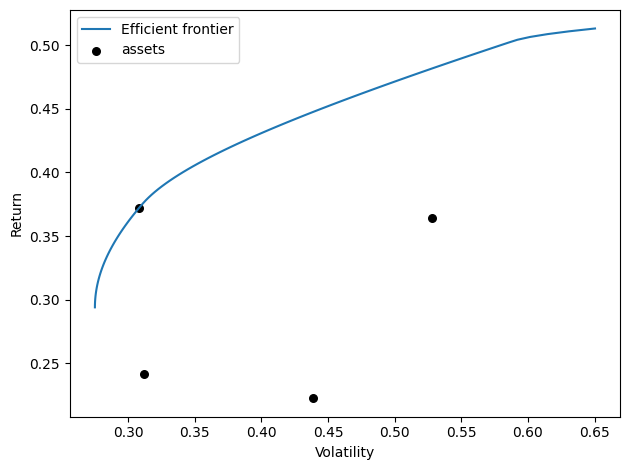

In [18]:
#Portfolio Optimization
mu=expected_returns.mean_historical_return(df)
S=risk_models.sample_cov(df)#sample covar

#optimize for max sharpe ratio
ef=EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda x: x.sum()==1)
plotting.plot_efficient_frontier(ef)

# Create a new EfficientFrontier instance for the next optimization
ef2 = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef2.add_constraint(lambda x: x.sum()==1)

weights=ef2.max_sharpe() #use the new instance for max_sharpe
cleaned_weights=ef2.clean_weights()#use the new instance
print(cleaned_weights)
ef2.portfolio_performance(verbose=True)#use the new instance

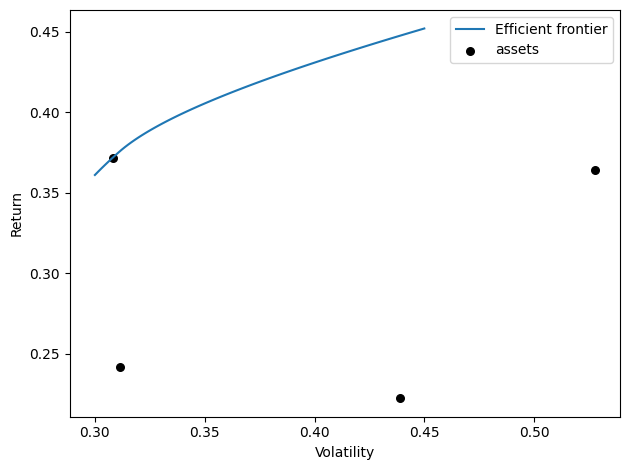

OrderedDict([('AAPL', 1.0), ('AMD', 0.02333), ('GOOG', 0.01119), ('NFLX', -0.03451)])
Expected annual return: 37.5%
Annual volatility: 31.1%
Sharpe Ratio: 1.21


(np.float64(0.3753760011871326),
 np.float64(0.31094908228950147),
 np.float64(1.2071944333241287))

In [25]:
#Portfolio Optimization
mu=expected_returns.mean_historical_return(df)
S=risk_models.sample_cov(df)#sample covar

#optimize for max sharpe ratio
ef=EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda x: x.sum()==1)

#100 portfolios with risks between 0.3 and 0.45
risk_range=np.linspace(0.3,0.45,100)

# Create a new EfficientFrontier instance for plotting
ef_plot = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef_plot.add_constraint(lambda x: x.sum()==1)
plotting.plot_efficient_frontier(ef_plot,ef_param='risk',ef_param_range=risk_range,show_assets=True,showfig=True)


weights=ef.max_sharpe() #use original instance for optimization
cleaned_weights=ef.clean_weights()#use original instance
print(cleaned_weights)
ef.portfolio_performance(verbose=True)#use original instance

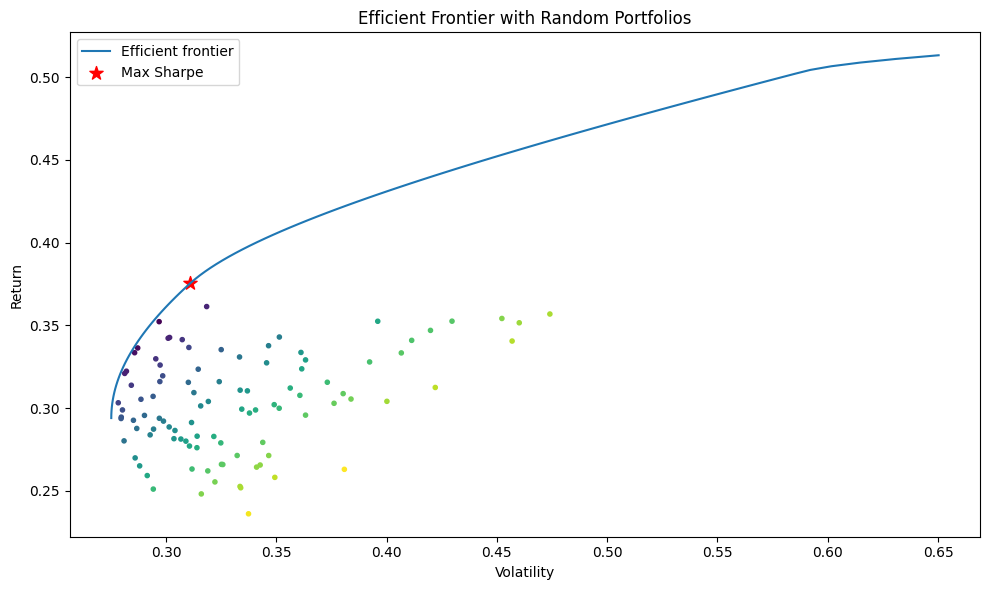

In [27]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)  # sample covar

# optimize for max sharpe ratio
# Create an instance for optimization
ef_opt = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef_opt.add_constraint(lambda x: x.sum() == 1)

# Create a separate instance for plotting
ef_plot = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef_plot.add_constraint(lambda x: x.sum() == 1)

fig, ax = plt.subplots(figsize=(10, 6))
plotting.plot_efficient_frontier(ef_plot, ax=ax, show_assets=False)  # Use plotting instance

# finding tangency portfolio - use optimization instance
ef_opt.max_sharpe()
ret_tangent, vol_tangent, w_tangent = ef_opt.portfolio_performance()
ax.scatter(vol_tangent, ret_tangent, marker='*', color='r', s=100, label='Max Sharpe')

# generating random portfolios
n_samples = 100
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
vols = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / vols
ax.scatter(vols, rets, marker='.', c=sharpes, cmap='viridis_r')

ax.set_title('Efficient Frontier with Random Portfolios')
ax.legend()
plt.tight_layout()
plt.show()